# Consumo de carne: ¿reducir o eliminar?

El objetivo de este análisis es trabajar con una encuesta realizada por Faunalytics a diversas personas. El experimento consistió en mostrarle a los encuestados uno de dos videos, de los cuales uno de ellos abogaba por la reducción del consumo de carne y el otro por la eliminación, con el objetivo de definir la mejor estrategia de defensa de los derechos de los animales.

Luego de ver el video, debían responder una serie de preguntas referentes a su estado de ánimo, tipo de dieta y, lo más importante para este análisis, sobre especismo y si estaban dispuestos a comprometerse a reducir o eliminar (dependiendo del video que hayan visto) el consumo de carne.

Decidí enfocarme en la gente de entre 18 y 30 años, edades más frecuentes y que son consideradas más flexibles a la hora de adoptar cambios.

*Fuentes*
* [Encuesta Faunalytics](https://osf.io/kdjnc/)
* [Score de especismo](https://static1.squarespace.com/static/59e80366a9db098f5ce8f8ad/t/5a39937b9140b7ca9c597bd9/1513722751608/Caviola-Everett-and-Faber-2018-Speciesism-JPSP-Pre-Print.pdf)

## Importación de librerías a utilizar en el análisis

Utilizaremos Pandas para trabajar sobre el dataset en forma de objeto DataFrame, NumPy para realizar posibles operaciones matemáticas entre arrays, y Matplotlib y Seaborn como herramientas de visualización. Importamos las librerías, creamos el dataset y observamos la información general, como nombres de columnas, tamaño del dataset, valores faltantes, entre otras características.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data = pd.read_csv('Reduce-Veg Data - cleaned.csv', encoding='cp1252')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 54 columns):
Duration (in seconds)    833 non-null int64
Finished                 833 non-null bool
RecordedDate             833 non-null object
age                      833 non-null int64
prev.participant         833 non-null object
diet_1                   63 non-null object
diet_2                   26 non-null object
diet_9                   87 non-null object
diet_3                   10 non-null object
diet_4                   33 non-null object
diet_5                   2 non-null object
diet_10                  69 non-null object
diet_6                   0 non-null float64
diet_7                   55 non-null object
diet_8                   544 non-null object
diet_7_TEXT              54 non-null object
happy                    833 non-null object
bored                    831 non-null object
proud                    833 non-null object
angry                    833 non-null object
hopeful   

In [106]:
data.head()

,Duration (in seconds),Finished,RecordedDate,age,prev.participant,diet_1,diet_2,diet_9,diet_3,diet_4,...,notes_3_TEXT,notes_4_TEXT,notes_5_TEXT,notes_6_TEXT,excluded,condition,date,purchase,meatveg,meatveg2
0,695,True,9/13/2019 12:29,22,"No, I promise that I haven’t done this before","Food allergy (nuts, shellfish, etc.)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,control with elim pledge,13-Sep,FP,veg,vegprot
1,542,True,9/13/2019 12:39,20,"No, I promise that I haven’t done this before",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,control with reduce pledge,NaN,NaN,NaN,NaN
2,355,True,9/13/2019 12:58,18,"No, I promise that I haven’t done this before","Food allergy (nuts, shellfish, etc.)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,reduce,NaN,NaN,NaN,NaN
3,458,True,9/13/2019 13:10,24,"No, I promise that I haven’t done this before",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,eliminate,NaN,NaN,NaN,NaN
4,521,True,9/13/2019 13:20,26,"No, I promise that I haven’t done this before",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,control with reduce pledge,13-Sep,FP,veg,vegprot


In [107]:
data.shape

(833, 54)

In [108]:
data.columns

Index(['Duration (in seconds)', 'Finished', 'RecordedDate', 'age',
       'prev.participant', 'diet_1', 'diet_2', 'diet_9', 'diet_3', 'diet_4',
       'diet_5', 'diet_10', 'diet_6', 'diet_7', 'diet_8', 'diet_7_TEXT',
       'happy', 'bored', 'proud', 'angry', 'hopeful', 'red.open', 'elim.open',
       'control.open', 'speciesism_1', 'speciesism_2', 'speciesism_3',
       'speciesism_4', 'speciesism_5', 'speciesism_6', 'gender',
       'gender_3_TEXT', 'status', 'status_5_TEXT', 'elim.pledge', 'red.pledge',
       'ID', 'notes_7', 'notes_1', 'notes_2', 'notes_3', 'notes_4', 'notes_5',
       'notes_6', 'notes_3_TEXT', 'notes_4_TEXT', 'notes_5_TEXT',
       'notes_6_TEXT', 'excluded', 'condition', 'date', 'purchase', 'meatveg',
       'meatveg2'],
      dtype='object')

In [109]:
for col in data.columns:
    print(col + ": " + str(data[col].isna().sum()) + " valores nulos")

Duration (in seconds): 0 valores nulos
Finished: 0 valores nulos
RecordedDate: 0 valores nulos
age: 0 valores nulos
prev.participant: 0 valores nulos
diet_1: 770 valores nulos
diet_2: 807 valores nulos
diet_9: 746 valores nulos
diet_3: 823 valores nulos
diet_4: 800 valores nulos
diet_5: 831 valores nulos
diet_10: 764 valores nulos
diet_6: 833 valores nulos
diet_7: 778 valores nulos
diet_8: 289 valores nulos
diet_7_TEXT: 779 valores nulos
happy: 0 valores nulos
bored: 2 valores nulos
proud: 0 valores nulos
angry: 0 valores nulos
hopeful: 1 valores nulos
red.open: 631 valores nulos
elim.open: 635 valores nulos
control.open: 432 valores nulos
speciesism_1: 4 valores nulos
speciesism_2: 2 valores nulos
speciesism_3: 3 valores nulos
speciesism_4: 2 valores nulos
speciesism_5: 5 valores nulos
speciesism_6: 4 valores nulos
gender: 2 valores nulos
gender_3_TEXT: 824 valores nulos
status: 1 valores nulos
status_5_TEXT: 829 valores nulos
elim.pledge: 419 valores nulos
red.pledge: 415 valores nul

## Trabajo de data wrangling

Considerando que parte del enfoque va a ser en el score de especismo y que hay pocas observaciones faltantes en estas columnas, dropeamos las que tienen valores nulos.

In [110]:
data = data.dropna(subset=['speciesism_1', 'speciesism_2', 'speciesism_3', 'speciesism_4', 'speciesism_5', 'speciesism_6'])

Creamos un nuevo DataFrame llamado "Speciesism" que contiene las columnas que nos indicarán el score de especismo, la edad, el género informado y la decisión que tomó acerca de reducir o eliminar (dependiendo del video que hayan visto).

In [111]:
speciesism = data[['age', 'speciesism_1', 'speciesism_2', 'speciesism_3', 'speciesism_4', 'speciesism_5', 'speciesism_6', 
                   'gender', 'elim.pledge', 'red.pledge']]

In [112]:
speciesism.shape

(823, 10)

In [113]:
speciesism.isna().sum()

age               0
speciesism_1      0
speciesism_2      0
speciesism_3      0
speciesism_4      0
speciesism_5      0
speciesism_6      0
gender            1
elim.pledge     416
red.pledge      408
dtype: int64

Tomamos los valores informados en las encuestas de especismo y los convertimos en su equivalente numérico para calcular el socre. Mientras más alto el resultado, más especista es la persona. Es importante notar que en el caso de la pregunta 5, el score es inverso.

In [114]:
spec_cols = ['speciesism_1', 'speciesism_2', 'speciesism_3', 'speciesism_4', 'speciesism_6']


for col in spec_cols:
    speciesism[col].replace({"Strongly agree": 7, "Agree": 6, "Somewhat agree": 5, "Neither agree nor disagree": 4, 
                       "Somewhat disagree": 3, "Disagree": 2, "Strongly disagree": 1}, inplace=True)

speciesism['speciesism_5'].replace({"Strongly agree": 1, "Agree": 2, "Somewhat agree": 3, "Neither agree nor disagree": 4, 
                       "Somewhat disagree": 5, "Disagree": 6, "Strongly disagree": 7}, inplace=True)

C:\Users\valen\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Filtramos las edades sobre las que decidimos enfocarnos, que son las que más fácil es la aceptación del cambio y al mismo tiempo las que más observaciones tienen.

In [115]:
speciesism.age.value_counts()

21    155
19    152
20    139
18    109
22     82
23     46
24     29
25     20
26      9
27      8
33      8
28      7
29      7
30      7
32      5
39      5
38      5
34      4
37      3
31      3
35      2
41      2
43      2
48      2
59      2
68      1
42      1
44      1
45      1
46      1
49      1
52      1
53      1
54      1
70      1
Name: age, dtype: int64

In [116]:
age_mask = (speciesism['age'] >= 18) & (speciesism['age'] <= 30)

speciesism = speciesism[age_mask]

In [117]:
speciesism.age.value_counts()

21    155
19    152
20    139
18    109
22     82
23     46
24     29
25     20
26      9
27      8
30      7
29      7
28      7
Name: age, dtype: int64

Creamos una nueva columna, "speciesism_score", que es una suma de todos los valores de las columnas sobre especismo dividido la cantidad de columnas que suman al score.

In [118]:
col_list = ['speciesism_1', 'speciesism_2', 'speciesism_3', 'speciesism_4', 'speciesism_5', 'speciesism_6']

speciesism['speciesism_score'] = speciesism[col_list].sum(axis=1)/len(col_list)

speciesism['speciesism_score']

0      4.166667
1      2.000000
2      1.500000
3      3.000000
4      3.000000
         ...   
828    2.333333
829    3.333333
830    3.500000
831    4.500000
832    1.333333
Name: speciesism_score, Length: 770, dtype: float64

## Visualización de distribuciones

En este apartado, vamos a empezar a explorar un poco las distribuciones de valores que encontramos en el score de especismo y la edad.

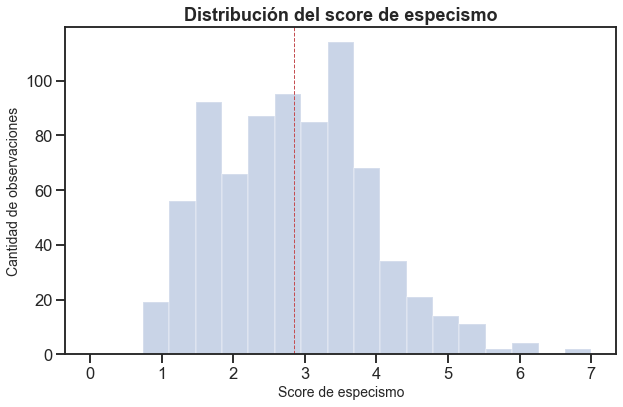

In [119]:
bins_speciesism = np.linspace(0, 7, num=20, dtype=list)

sns.set_style("ticks")
plt.figure(figsize=[9,6])
plt.hist(speciesism['speciesism_score'], bins=bins_speciesism, alpha=0.3, color='b')

plt.axvline(speciesism['speciesism_score'].mean(), color='r', linestyle='dashed', linewidth=1)

plt.xlabel('Score de especismo', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución del score de especismo', fontdict={'fontsize': 18}, loc='center', fontweight='bold')

plt.tight_layout()

plt.savefig('Histograma score especismo.png')

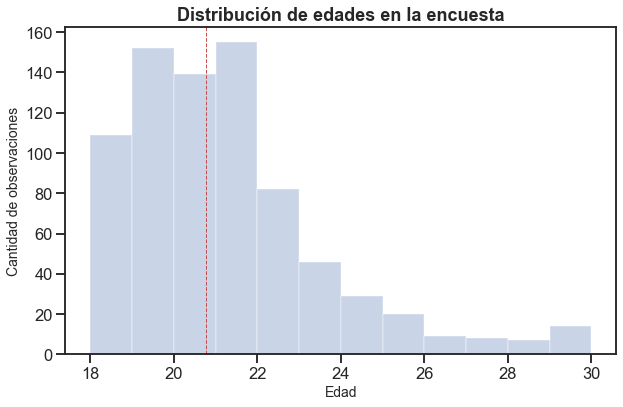

In [120]:
bins_edad = np.linspace(18, 30, num=13, dtype=list)

sns.set_style("ticks")
plt.figure(figsize=[9,6])
plt.hist(speciesism['age'], bins=bins_edad, alpha=0.3, color='b')

plt.axvline(speciesism['age'].mean(), color='r', linestyle='dashed', linewidth=1)

plt.xlabel('Edad', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución de edades en la encuesta', fontdict={'fontsize': 18}, loc='center', fontweight='bold')

plt.tight_layout()

plt.savefig('Histograma edades.png')

Filtramos el dataset de especismo y lo separamos en dos: uno para quienes vieron el video de reducción de consumo de carne y otro para quienes vieron el video de eliminación de consumo. Seleccionamos únicamente los valores no nulos.

In [121]:
reduce_pledge = speciesism.loc[speciesism['red.pledge'].notnull()]
reduce_pledge['red.pledge'].value_counts()

Yes, I will pledge to reduce the amount of meat that I eat    238
No, thanks                                                    158
Name: red.pledge, dtype: int64

In [122]:
eliminate_pledge = speciesism.loc[speciesism['elim.pledge'].notnull()]
eliminate_pledge['elim.pledge'].value_counts()

No, thanks                                321
Yes, I will pledge to stop eating meat     53
Name: elim.pledge, dtype: int64

Reemplazamos los valores originales de la encuesta por "yes" y "no" para simplificar el tratamiento de los datos y que las labels de los gráficos sean más legibles.

In [123]:
reduce_pledge['red.pledge'] = reduce_pledge['red.pledge'].replace({'Yes, I will pledge to reduce the amount of meat that I eat': 'Yes', 'No, thanks': 'No'})
eliminate_pledge['elim.pledge'] = eliminate_pledge['elim.pledge'].replace({'Yes, I will pledge to stop eating meat': 'Yes', 'No, thanks': 'No'})

C:\Users\valen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\valen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creamos las visualizaciones para ver la cantidad y los porcentajes de sí y no por tipo de promesa.

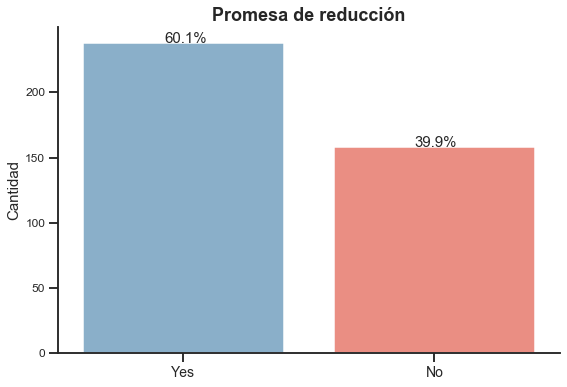

In [124]:
countplt, ax_red = plt.subplots(figsize = (9,6))
ax_red = sns.countplot(x="red.pledge", data=reduce_pledge, palette=['#80b1d3','#fb8072'])

sns.set_style("ticks")

total = float(len(reduce_pledge))

# ax_red.patches[0]
percentage_yes = '{:.1f}%'.format(100 * ax_red.patches[0].get_height()/total)
x = 0.0075
y = ax_red.patches[0].get_height()
ax_red.annotate(percentage_yes, (x, y),ha='center', fontsize=15)

# ax_red.patches[1]
percentage_no = '{:.1f}%'.format(100 * ax_red.patches[1].get_height()/total)
x = 1.005
y = ax_red.patches[1].get_height()
ax_red.annotate(percentage_no, (x, y),ha='center', fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

sns.despine()

# ax labels
ax_red.set_title("Promesa de reducción", size=18, fontweight='bold')
ax_red.set_xlabel('', size=14)
ax_red.set_ylabel('Cantidad', size=15)

plt.savefig('Countplot reducción.png')

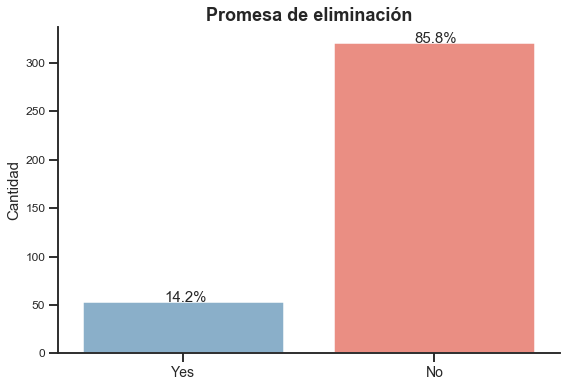

In [125]:
countplt, ax_el = plt.subplots(figsize = (9,6))
ax_el = sns.countplot(x="elim.pledge", data=eliminate_pledge, palette=['#80b1d3','#fb8072'], order=['Yes', 'No'])

sns.set_style("ticks")

total = float(len(eliminate_pledge))

# ax_el.patches[0]
percentage_yes = '{:.1f}%'.format(100 * ax_el.patches[0].get_height()/total)
x = 0.0075
y = ax_el.patches[0].get_height()
ax_el.annotate(percentage_yes, (x, y),ha='center', fontsize=15)

# ax_el.patches[1]
percentage_no = '{:.1f}%'.format(100 * ax_el.patches[1].get_height()/total)
x = 1.005
y = ax_el.patches[1].get_height()
ax_el.annotate(percentage_no, (x, y),ha='center', fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

sns.despine()

# ax labels
ax_el.set_title("Promesa de eliminación", size=18, fontweight='bold')
ax_el.set_xlabel('', size=14)
ax_el.set_ylabel('Cantidad', size=15)

plt.savefig('Countplot eliminación.png')

Separamos los valores de respuestas "sí" y "no" para ambos tipos de promesa y usarlos para elaborar los gráficos de distribución para cada una de ellas.

In [126]:
reduce_pledge_yes = reduce_pledge[reduce_pledge['red.pledge'] == 'Yes']
reduce_pledge_no = reduce_pledge[reduce_pledge['red.pledge'] == 'No']
eliminate_pledge_yes = eliminate_pledge[eliminate_pledge['elim.pledge'] == 'Yes']
eliminate_pledge_no = eliminate_pledge[eliminate_pledge['elim.pledge'] == 'No']

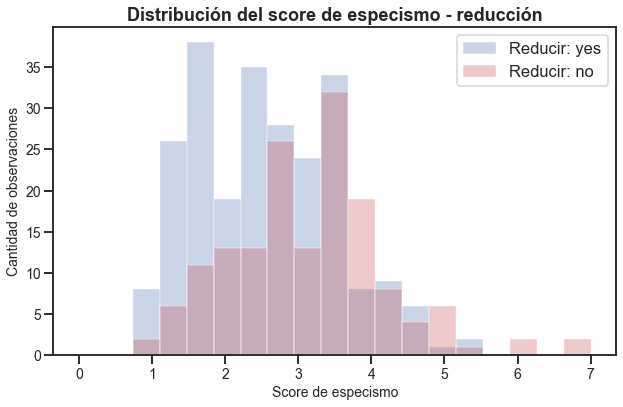

In [127]:
bins_speciesism = np.linspace(0, 7, num=20, dtype=list)

sns.set_style("ticks")

countplt, ax_el = plt.subplots(figsize = (9,6))
ax_1 = plt.hist(reduce_pledge_yes['speciesism_score'], bins=bins_speciesism, alpha=0.3, color='b', histtype='barstacked', label='Reducir: yes')
ax_2 = plt.hist(reduce_pledge_no['speciesism_score'], bins=bins_speciesism, alpha=0.3, color='r', histtype='barstacked', label='Reducir: no')

plt.xlabel('Score de especismo', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución del score de especismo - reducción', fontdict={'fontsize': 18}, loc='center', fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.legend()

plt.savefig('Histograma score especismo reduccion.png')

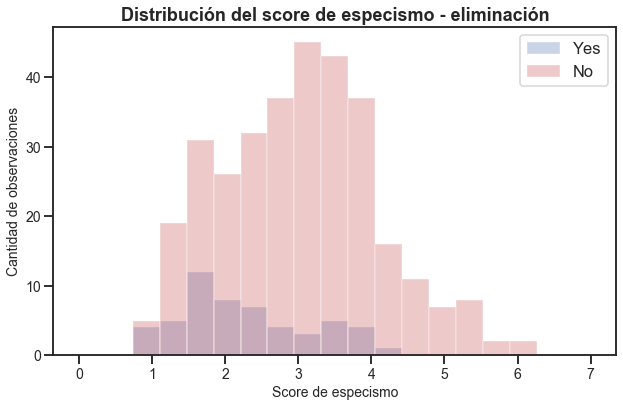

In [128]:
bins_speciesism = np.linspace(0, 7, num=20, dtype=list)

sns.set_style("ticks")

countplt, ax_el = plt.subplots(figsize = (9,6))
ax_1 = plt.hist(eliminate_pledge_yes['speciesism_score'], bins=bins_speciesism, alpha=0.3, color='b', histtype='barstacked', label='Yes')
ax_2 = plt.hist(eliminate_pledge_no['speciesism_score'], bins=bins_speciesism, alpha=0.3, color='r', histtype='barstacked', label='No')

plt.xlabel('Score de especismo', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución del score de especismo - eliminación', fontdict={'fontsize': 18}, loc='center', fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.legend()

plt.savefig('Histograma score especismo eliminacion.png')

In [129]:
median_score_reduce_yes = reduce_pledge_yes['speciesism_score'].median()
median_score_reduce_no = reduce_pledge_no['speciesism_score'].median()
median_score_eliminate_yes = eliminate_pledge_yes['speciesism_score'].median()
median_score_eliminate_no = eliminate_pledge_no['speciesism_score'].median()

In [130]:
data_median = {'type_of_median': ['Reducir: yes', 'Reducir: no', 'Eliminar: yes', 'Eliminar: no'], 'median_score': [median_score_reduce_yes, median_score_reduce_no, median_score_eliminate_yes, median_score_eliminate_no]}

median_score_df = pd.DataFrame(data_median)

median_score_df

,type_of_median,median_score
0,Reducir: yes,2.500000
1,Reducir: no,3.166667
2,Eliminar: yes,2.000000
3,Eliminar: no,3.000000


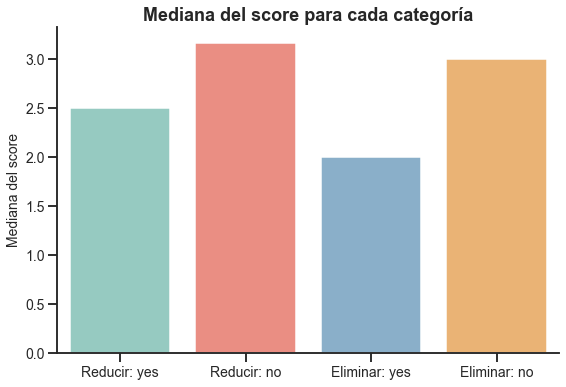

In [131]:
sns.set_style("ticks")
sns.set_context("talk")

barplt, ax = plt.subplots(figsize = (9,6))
ax = sns.barplot(x="type_of_median", y='median_score', data=median_score_df, palette=['#8dd3c7','#fb8072','#80b1d3','#fdb462'])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('', size= 14)
plt.ylabel('Mediana del score', size= 14)
plt.title('Mediana del score para cada categoría', fontdict={'fontsize': 18}, loc='center', fontweight='bold')

sns.despine()

plt.savefig('Barplot score por categoria.png')

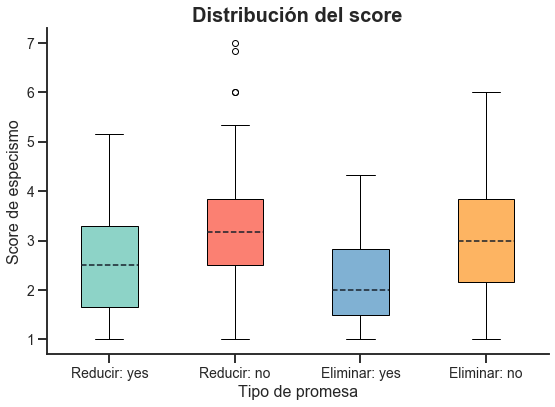

In [132]:
medianprops = dict(linestyle='--', linewidth=1.5, color='#17202A')

sns.set_style("ticks")
sns.set_context("talk")

fig, ax = plt.subplots()

bplot= ax.boxplot([reduce_pledge_yes['speciesism_score'], reduce_pledge_no['speciesism_score'], eliminate_pledge_yes['speciesism_score'], eliminate_pledge_no['speciesism_score']], vert=True, patch_artist=True, labels=['Reducir: yes', 'Reducir: no', 'Eliminar: yes', 'Eliminar: no'], medianprops=medianprops)
#ax.set_title('CO por estación', fontsize=20)

colors = ['#8dd3c7','#fb8072','#80b1d3','#fdb462']

 
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
plt.xlabel('Tipo de promesa', size= 16)
plt.ylabel('Score de especismo', size= 16)
plt.title('Distribución del score', fontdict={'fontsize': 20}, loc='center', fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig.set_size_inches(9, 6)

sns.despine()

plt.savefig('Boxplot distribucion score.png')

### Código adicional no utilizado

In [133]:
mean_score_reduce_yes = reduce_pledge_yes['speciesism_score'].mean()
mean_score_reduce_no = reduce_pledge_no['speciesism_score'].mean()
mean_score_eliminate_yes = eliminate_pledge_yes['speciesism_score'].mean()
mean_score_eliminate_no = eliminate_pledge_no['speciesism_score'].mean()

In [134]:
data_mean = {'type_of_mean': ['Reducir: yes', 'Reducir: no', 'Eliminar: yes', 'Eliminar: no'], 'mean_score': [mean_score_reduce_yes, mean_score_reduce_no, mean_score_eliminate_yes, mean_score_eliminate_no]}

mean_score_df = pd.DataFrame(data_mean)

mean_score_df

,type_of_mean,mean_score
0,Reducir: yes,2.553221
1,Reducir: no,3.144515
2,Eliminar: yes,2.273585
3,Eliminar: no,3.014538


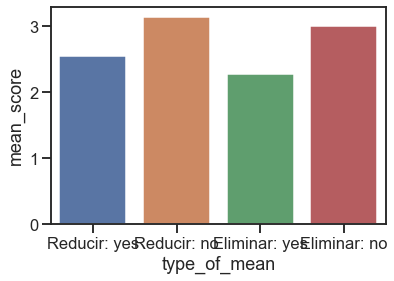

In [135]:
ax = sns.barplot(x="type_of_mean", y='mean_score', data=mean_score_df)